In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
abspath = False
path = 'results/shear_field_center'

if abspath: 
    path = '/home/zhuoqizhang/delve_shear/results/shear_field_center'

Text(0.5, 0, '$\\theta$ (arcmin)')

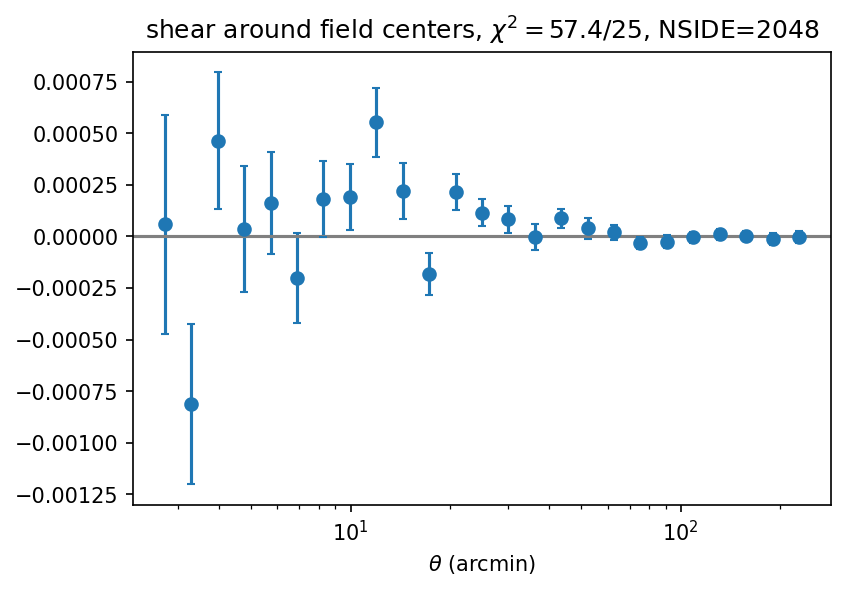

In [3]:
FP_NSIDE = 2048
rsep = np.load(f'{path}/rsep_{FP_NSIDE}.npy')
xi = np.load(f'{path}/xi_{FP_NSIDE}.npy')
cov = np.load(f'{path}/cov_{FP_NSIDE}.npy')
chi2 = np.round(np.dot(np.dot(xi,np.linalg.inv(cov)),xi),1)

dpi = 150
plt.rcParams['figure.dpi']= dpi
plt.axhline(0,color='grey')
plt.errorbar(rsep,xi,yerr=np.sqrt(np.diag(cov)),fmt='o',capsize=2)
plt.xscale('log')
plt.title('shear around field centers, '+r'$\chi^2=$'+str(chi2)+f'/25, NSIDE={FP_NSIDE}')
plt.xlabel(r'$\theta$ (arcmin)')

## Determine NSIDE

In [49]:
FP_NSIDE_list = np.array([8,16,32, 64, 128, 256, 512, 1024, 2048, 4096])
fc_frac = []
for FP_NSIDE in tqdm.tqdm(FP_NSIDE_list): 
    inds = np.unique(hp.ang2pix(FP_NSIDE,ra,dec,lonlat=True))
    fc_pix = hp.ang2pix(FP_NSIDE,fc_ra,fc_dec,lonlat=True)
    mask = np.in1d(fc_pix, inds)
    fc_frac.append(np.sum(mask)/np.size(mask))

100%|██████████| 10/10 [00:27<00:00,  2.71s/it]


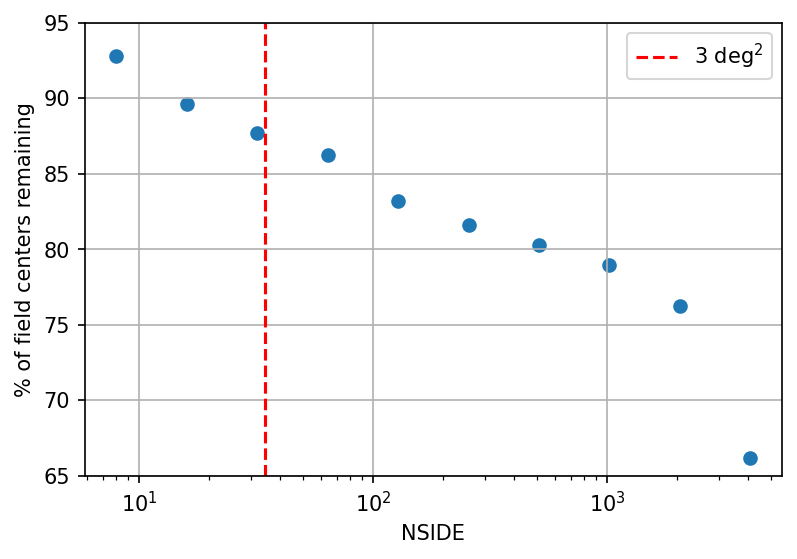

In [61]:
dpi = 150
plt.rcParams['figure.dpi']= dpi
plt.scatter(FP_NSIDE_list, np.array(fc_frac)*100)
plt.xscale('log')
plt.ylabel('% of field centers remaining')
plt.xlabel('NSIDE')
plt.grid()
plt.ylim((65,95))
plt.axvline(np.sqrt(43000/12/3),color='red',ls='--',label=r'3 deg$^2$')
plt.legend()